# Bibliotecas

In [97]:
import pandas as pd

# Modelagem de dados



- Abrir e organizar os dados das ações do Ibx, armazenados em um arquivo csv

In [98]:
#atribui a variavel ibx_precos o arquivo csv "precos_ibx.csv"
ibx_precos = pd.read_csv("precos_ibx.csv", index_col = 0)
#mostra as cinco primeiras linhas do arquivo
ibx_precos.head()

,ABEV3,AEDU3,ALLL3,ALPA4,ALSC3,ALUP11,AMBV3,AMIL3,ANIM3,ARTR3,...,VALE5,VIVO4,VIVR3,VIVT4,VLID3,VVAR11,VVAR3,WEGE3,WIZS3,YDUQ3
date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,4.970,NaN,15.892,2.500,NaN,NaN,25.692,13.459,NaN,5.782,...,28.902,47.556,2820.680,19.188,10.608,NaN,3.532,4.277,NaN,5.984
2010-01-29,4.928,NaN,14.722,2.645,7.588,NaN,26.127,13.066,NaN,6.037,...,28.861,46.916,2853.101,18.502,10.755,NaN,3.051,4.196,NaN,5.432
2010-02-26,4.957,NaN,15.717,2.819,8.722,NaN,25.976,13.115,NaN,6.450,...,30.443,43.065,2512.674,17.532,9.993,NaN,2.523,4.152,NaN,5.429
2010-03-31,4.689,NaN,15.892,2.774,8.955,NaN,24.297,13.668,NaN,6.972,...,33.935,43.986,2585.623,17.136,9.562,NaN,3.071,4.480,NaN,5.212
2010-04-30,4.875,NaN,15.424,2.700,8.306,NaN,25.897,14.063,NaN,6.971,...,32.131,42.073,2293.829,16.164,9.483,NaN,2.913,4.185,NaN,4.915


In [99]:
#formata o indice para um estrutura de data no qual soh aparece ano e mes
ibx_precos.index = pd.to_datetime(ibx_precos.index, format='%Y-%m-%d').to_period("M")


In [100]:
#atribui a variavel "retornos" aos retornos calculados pelos precos de ibx_precos e filtra apenas dados a partir de 2010-12
retornos = ibx_precos['2010-11':].pct_change().iloc[1:]

# Estratégia adotada

A estratégia de investimento é ver quais são as "n" ações que melhor performaram no período de um mês, no nosso caso são as 10 melhores, para que no mês seguinte, os recurosos financeiros sejam alocandos exatamente na compra delas.

In [101]:
def estrategia(ativos, quantidade, comp):
    """
    recebe um DataFrame com os retornos de algumas acoes e
    devolve um novo apenas com os retornos das melhores, em ordem decrescente, no período t+1 de cada uma
    :ativos:DataFrame contendo os retornos de acoes a serem compradas
    :quantidade:quantidade das "n" primeiras acoes a serem selecionadas, em cada periodo
    :comp:DataFrame com os tickers das acoes que compunham o IBX em cada mes do periodo analisado
    """
    #DataFrame vazio
    retornos_top10 = pd.DataFrame()
    for linha in range(len(ativos)-1):
        #variavel datas recebe como string o indice da linha indicada
        datas = str(ativos.index[linha])
        #a variavel juncao eh responsavel por filtrar as acoes do DataFrame ativos, segundo a composicao de cada periodo mostrado no DataFrame comp
        juncao = ativos[comp.iloc[linha].dropna().to_numpy()]
        #DataFrame com os valores organizados em ordem decrescente, analizando o periodo determinado pela variavel datas 
        ordenados = juncao.sort_values(by = datas, axis = 1, ascending = False)
        #transposicao dos valores para faciliatr captar com a funcao head() apenas a quantidade de elementos determinada pela "quantidade"
        invertido = ordenados.T.head(quantidade)
        #troca-se o indice com o nome das acoes por numeros, para que seja possivel a juncao dos dados em cada loop do for
        invertido.index = range(quantidade)
        #acrecenta ao DataFrame, criado incialmente, a performance das acoes do periodo datas+1
        retornos_top10[str(comp.index[linha+1])] = invertido[str(comp.index[linha+1])]
    return retornos_top10
    

In [102]:
#DataFrame com a composicao do IBX
comp_ibx = pd.read_csv("composicao_ibx_mensal.csv", index_col = 0)

In [103]:
portfolio = estrategia(retornos, 10, comp_ibx)

In [104]:
portfolio

,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,-0.029487,0.073233,0.115922,0.140565,0.058705,-0.010539,0.011012,-0.054055,0.025241,0.008499,...,0.242375,-0.126436,-0.107890,0.072048,0.033618,0.001295,0.087789,-0.024501,0.008721,-0.126531
1,-0.124724,0.036303,-0.002584,0.029332,0.031021,-0.031890,-0.078996,0.055582,0.045216,0.101669,...,0.157362,-0.105267,0.105843,0.010321,0.256748,0.189030,-0.032619,-0.030015,0.047922,0.176488
2,-0.042034,-0.003582,0.107941,0.022962,-0.116466,-0.087734,-0.009961,-0.051072,-0.281340,-0.109380,...,0.080897,0.241869,-0.066940,0.162457,0.212702,-0.189651,0.319760,0.056180,0.027182,0.189846
3,-0.058265,0.024223,0.010283,-0.030423,-0.027472,-0.053545,0.023812,-0.060392,-0.082558,0.233839,...,-0.028507,-0.003697,-0.023810,0.208302,0.060242,0.100861,0.028723,-0.124221,0.153598,0.140671
4,0.028279,0.021298,0.011903,-0.001502,-0.030437,0.003376,-0.053133,0.027866,-0.337295,0.018732,...,-0.006264,0.000000,0.148189,0.021696,0.278205,0.032392,0.041377,0.087880,0.051938,0.267877
5,-0.048861,-0.023728,0.112916,-0.021200,0.097484,-0.097529,-0.012987,-0.179774,-0.084087,-0.034410,...,-0.019684,0.194879,-0.059367,0.139960,0.036270,-0.090382,-0.071499,-0.024823,-0.069399,0.157316
6,-0.028031,-0.030882,0.005420,-0.023114,0.063830,-0.022470,-0.063774,-0.036946,-0.125000,0.037360,...,0.036961,0.370861,0.129275,-0.016594,0.046576,-0.082786,0.106282,0.020594,0.136152,0.029046
7,-0.016381,0.066060,0.070646,0.008346,0.045002,-0.009464,-0.096982,-0.063724,-0.090909,0.085955,...,0.001666,0.224080,0.165043,0.137421,-0.004197,-0.008837,-0.073226,0.014264,-0.003312,0.117542
8,0.029452,-0.027260,0.005519,0.032457,0.007204,0.004645,-0.100466,-0.014540,-0.100486,0.051308,...,0.000926,-0.016285,0.171505,0.012486,0.094796,0.190369,-0.105005,0.017212,0.081427,0.369668
9,-0.007331,-0.055556,0.048784,0.060979,0.055338,0.327150,-0.203840,-0.253873,-0.231175,0.126920,...,0.101881,0.130705,0.088353,0.104337,-0.013411,0.253333,-0.126037,-0.135034,-0.013643,0.168269


# Alocação de Portfólio e Estratégia de Retorno

Realizaremos uma alocação de portfolio adotando pesos iguais para as ações e calcularemos os retornos e os montantes dos períodos.

In [105]:
def retornos_portfolio(inicial, portfolio):
    """
    recebe um DataFrame com os retornos das acoes e devolve um
    novo contendo o montante e o retorno, ao longo de um periodo
    a alocacao de portfólio eh feita utiizando-se o criterio de pesos iguais
    :incial:investimento inicial
    :portfolio:DataFrame com os retornos das acoes
    """
    #determina o peso que sera aplicado nas acoes, seguindo o criterio de pesos iguais no portfolio 
    peso = 1/len(portfolio)
    #aplica o peso e depois soma-se todas acoes entre si, levando em consideracao as linhas
    portfolio_novo = (portfolio*peso).sum(axis=0)
    #calculo da evolucao do montante por periodo
    montante_indice = inicial*(1+portfolio_novo).cumprod()
    return pd.DataFrame({
        'Montante': montante_indice,
        'Retornos' : portfolio_novo
    }, index=portfolio.columns)

In [126]:
retornos_portfolio(100, portfolio).tail()

,Montante,Retornos
2019-08,296.156653,0.039562
2019-09,301.355554,0.017555
2019-10,297.062326,-0.014246
2019-11,309.556326,0.042059
2019-12,355.686167,0.149019


# Análise de Risco

 - Cálculo do retorno acumulado

In [107]:
#filtra apenas a coluna "Retornos" para a variável acumulado
acumulado = retornos_portfolio(100, portfolio)["Retornos"]

In [108]:
#calcula o retorno acumulado
(((acumulado+1).prod()-1))*100

255.68616743251567

 - Cálculo do drawdown

In [142]:
def analise(rt_series:pd.Series):
    """
    Recebe uma Series contendo os retornos e devolve um DataFrame
    com os montantes, os picos e os drawdown
    :rt_serires:Series com os retornos
    """
    mt = 1000*(1+rt_series).cumprod()
    #mantem apenas os valores maximos do periodo
    picos_anteriores = mt.cummax()
    #calculo do drawdown
    drawdown = (mt - picos_anteriores)/picos_anteriores
    return pd.DataFrame({
        "Montante":mt,
        "Picos":picos_anteriores,
        "Drawdowns":drawdown
    })

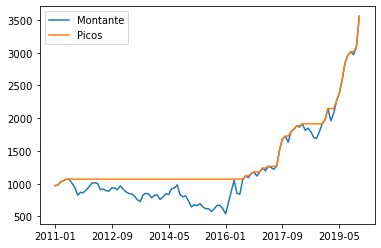

In [143]:
#plota o grafico da evolucao do montante junto com os picos
analise(acumulado)[["Montante","Picos"]].plot()

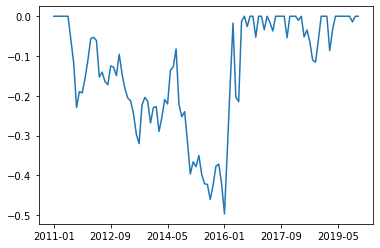

In [152]:
#plota um grafico com os drawdowns ao longo do periodo
analise(acumulado)["Drawdowns"].plot()

- Manipulação dos dados do índice IBX para comparação

In [182]:
#variavel com arquivo csv com os dados do ibx
ibx_indice = pd.read_csv("ibx.csv")

In [183]:
#retira os NaN
ibx_indice = ibx_indice.dropna()

In [184]:
#coloca como index a coluna "Date"
ibx_indice = ibx_indice.set_index("Date")

In [185]:
#formata as datas
ibx_indice.index = pd.to_datetime(ibx_indice.index, format='%Y-%m-%d').to_period("M")

In [187]:
#usa a funcao pct para conseguir os retornos e filtra as datas a partir de 2010-11
ibx_indice = ibx_indice['2010-11':].pct_change().iloc[1:]

In [188]:
#Series com os retornos do DataFrame anterior
retornos_ibx = ibx_indice["IBX"]

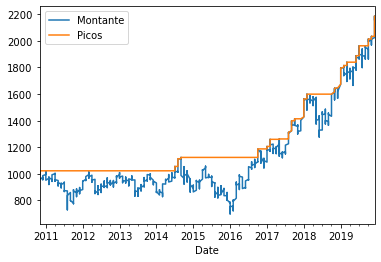

In [189]:
analise(retornos_ibx)[["Montante","Picos"]].plot()

In [138]:
#calculo retornos acumulado
((((ibx_indice+1).prod())-1))*100

IBX    115.953394
dtype: float64

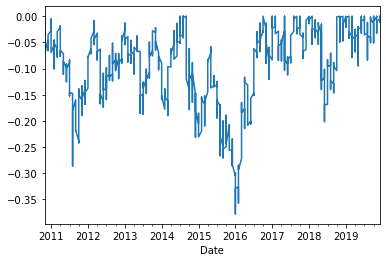

In [164]:
analise(retornos_ibx)["Drawdowns"].plot()